In [ ]:
#Lesson 2: Wrangling Time Series Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [2]:
#converting column to datetime

df["Month"] = pd.to_datetime(df["Month"])

Text(0, 0.5, 'Passengers')

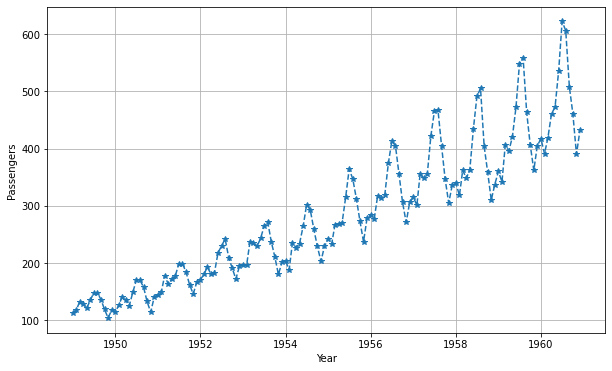

In [3]:
df.set_index("Month", inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [4]:
# Check for missing values
df.isnull().values.any()

False

In [5]:
#Since there are no missing values in the data set.

In [6]:
#To show how missing values are handle a duplicate of the dataset will be made. And delete some values data at random

df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers' ] = rows['Passengers'] 
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [7]:
#Filling mising data by imputation Forward-fill 

df_copy_ffill = df_copy.fillna(method= 'ffill') 
df_copy_ffill.isnull().sum() 


Passengers    0
dtype: int64

In [8]:
#Filling missing data by impiutation Backward-fill

df_copy_bfill = df_copy.fillna(method= 'bfill')
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [9]:
#Filling missing data by interpolation 

df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

In [10]:
# Downsampling and Upsampling 

In [11]:
#Downsampling to a quarterly data points 

df_quarterly = df.resample('3M').mean()
plt.show()

In [12]:
#Upsampling to a Daily data points

df_daily = df.resample('D').mean()
plt.show()

In [13]:

df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()
plt.show()

In [14]:
#Time Series Specific Expolatory Model


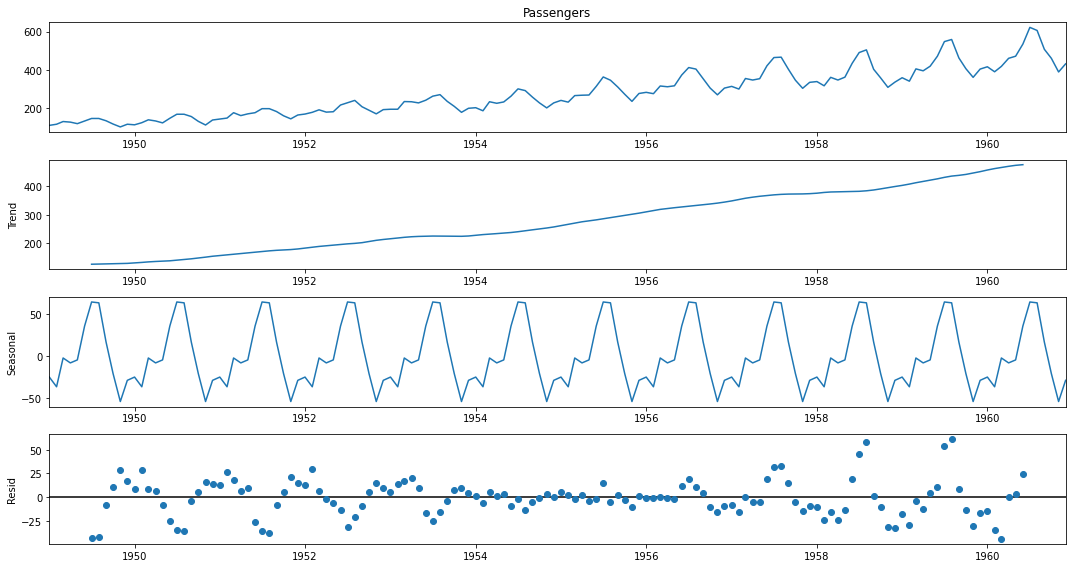

In [15]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='addictive')
decompose_series.plot()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'NO. of lags used: {adf_result[2]}')
print(f'NO.of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}, {v}')

ADF Statistics: 0.8153688792060462
p-value: 0.991880243437641
NO. of lags used: 13
NO.of observations used: 130
Critical Values:
 1%, -3.4816817173418295
 5%, -2.8840418343195267
 10%, -2.578770059171598


In [17]:
#From the results obtained, the p-value is greater than the critical value at a 5% 
#significance level and, the ADF statistic is greater that any of the critical values 
#obtain. This confirms that the series is indeed non-stationary. 

In [18]:
#Convert time series to stationary by removing trend and seasonality 

#Transformation and Differencing 


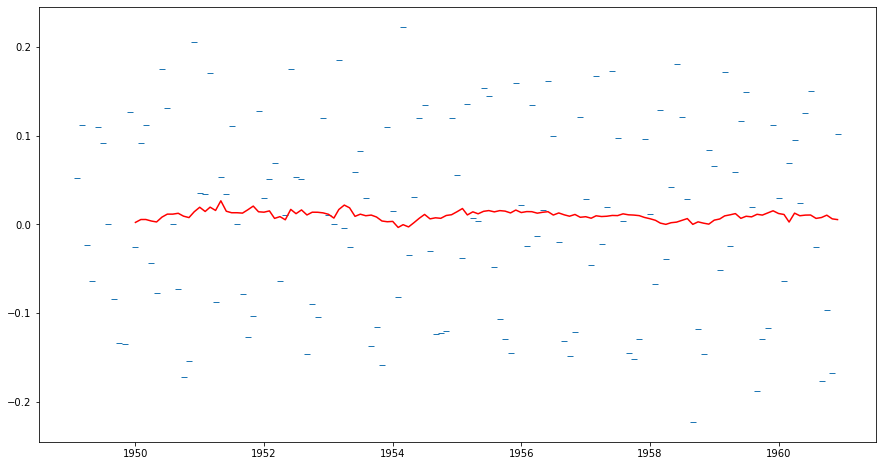

In [19]:

df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '_')
plt.plot(df_diff.rolling(12).mean(), color = 'red')
plt.show()

In [ ]:
#Lesson 4

In [ ]:
# Time Series Forecasting Using  Stochastic Models

In [22]:
import matplotlib.pyplot as plt

In [26]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


NameError: name 'plot' is not defined

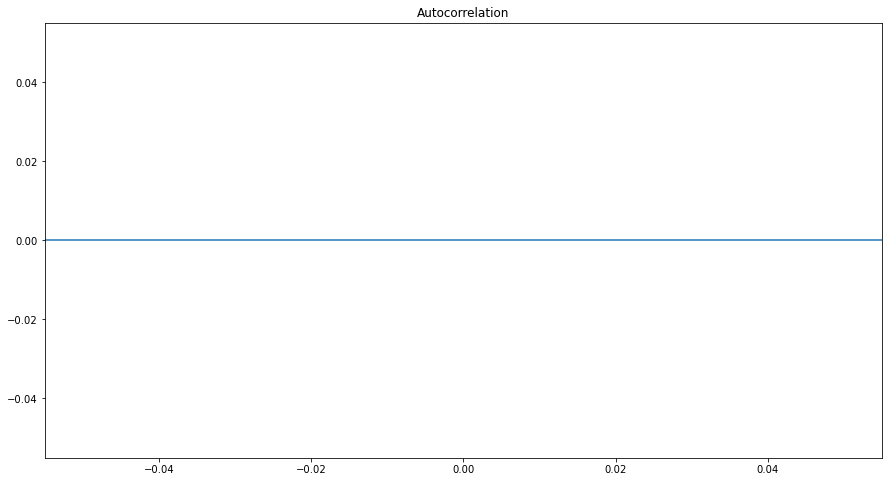

In [29]:
#ACF
plot_acf(df_diff, lags = range(0, 20))
plot.show()

NameError: name 'plot' is not defined

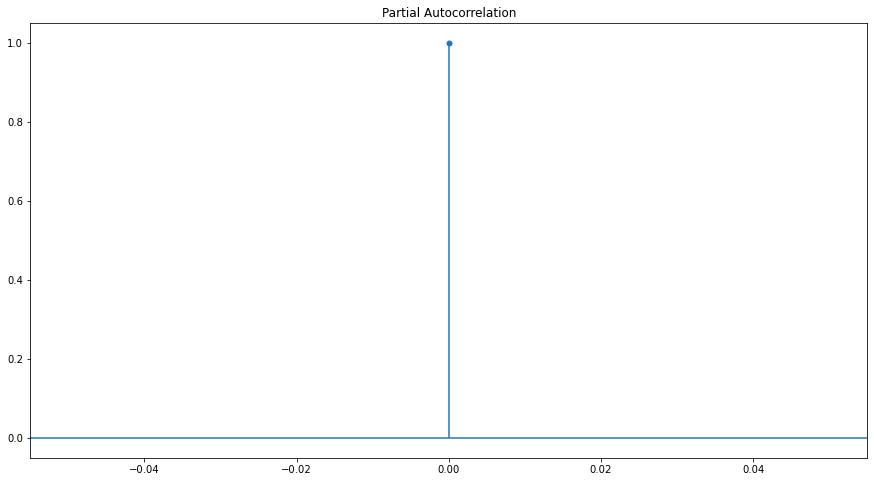

In [28]:
#PACF
plot_pacf(df_diff, lags = range(0, 20))
plot.show()